In [ ]:
import pandas as pd
import numpy as np 
import matplotlib 
from matplotlib import pyplot as plt

# General Data Insights

In [28]:
d_frame= pd.read_csv(r"C:\Users\tumel\OneDrive\Desktop\Tuks Personal Projects\Datasets\Student Dataset\Student Dataset\student_dataset.csv")
d_frame.head()

,Student_Names,Phone_No.,Math,Physics,Chemistry,Grade,Comment,Roll No.,School Name,Student Address
0,Donald Contreras,9208625450,76,84,54,B+,Good Pursuance,524613,Martin Luther School,"478 Mooney Park, New Valerie, VI 28836"
1,Joseph Horton,9886408555,91,75,78,A,Very Good Achivement,561635,Martin Luther School,"037 Matthew Shores, Greeneton, CA 98399"
2,Savannah Burns MD,9047592659,64,98,20,C,Below Average Achivement,560985,Martin Luther School,"96124 Lloyd Streets, Edwardmouth, DC 61677"
3,William Carter,9048473864,15,95,32,D,Poor Pursuance,535126,Martin Luther School,"11959 Clark Village, Ivanview, NH 43940"
4,John Rodriguez,9685225730,86,86,66,B+,Good Pursuance,559410,Martin Luther School,"051 Weaver Glen Apt. 724, West Davidborough, M..."


In [30]:
#How many students are in the dataset
print(len( d_frame["Student_Names"]))

9000


In [40]:
# what is the distribtion of grades across all students
# distribution refers to how frequently each grade appears across all student records
grade_counts=d_frame['Grade'].value_counts()
print(grade_counts)

Grade
D     2887
C     2187
B     1797
B+    1014
F      706
A      360
A+      49
Name: count, dtype: int64


In [118]:
# what is the average , minmun , and maximun score for math , physics and chemistry 
# maximun score for maths
largest_math= max( d_frame['Math'])
print( "maximum in the maths column:",largest_math)
#minimum score for maths
lowest_maths=min( d_frame["Math"])
print("Minimum in the maths column:", lowest_maths)
#average mark in for maths
average_maths = d_frame["Math"].mean()
print("average in the math column:", average_maths)

maximum in the maths column: 100
Minimum in the maths column: 10
average in the math column: 55.27611111111111


In [64]:
# maximun score for physics
largest_Physics= max( d_frame['Physics'])
print( "maximum in the Physics column:",largest_Physics)
#minimum score for physics
lowest_Physics=min( d_frame["Physics"])
print("Minimum in the Physics column:", lowest_Physics)
#average mark in for physics
average_Physics = d_frame["Physics"].mean()
print("average in the Physics column:", average_Physics)

maximum in the Physics column: 100
Minimum in the Physics column: 10
average in the Physics column: 54.69755555555555


In [66]:
#maximum score for chemistry 
largest_chem= max ( d_frame["Chemistry"])
print("maximun in the chemistry column:",largest_chem)
#minimum score for chemistry 
lowest_chem=min(d_frame["Chemistry"])
print("minimum in the chemistry column",lowest_chem)
#average score for chemistry
average_chem=(d_frame["Chemistry"].mean())
print("average in the chemistry :",average_chem)

maximun in the chemistry column: 100
minimum in the chemistry column 10
average in the chemistry : 54.85488888888889


In [72]:
# Checking for any missing values in the dataset
print(d_frame.isnull().sum())

Student_Names      0
Phone_No.          0
Math               0
Physics            0
Chemistry          0
Grade              0
Comment            0
Roll No.           0
School Name        0
Student Address    0
dtype: int64


# Peformance by Subject 

In [104]:
threshold = 50
total_students = len(d_frame)

# Dictionary to store failure percentages
failure_rates = {
    'Math': (d_frame['Math'] < threshold).sum() / total_students * 100,
    'Physics': (d_frame['Physics'] < threshold).sum() / total_students * 100,
    'Chemistry': (d_frame['Chemistry'] < threshold).sum() / total_students * 100
}

# Display results
for subject, rate in failure_rates.items():
    print(f"{subject}: {rate:.2f}% students failed")


Math: 43.42% students failed
Physics: 44.19% students failed
Chemistry: 43.84% students failed


In [115]:
# Calculate standard deviation for each subject
std_devs = {
    'Math': d_frame['Math'].std(),
    'Physics': d_frame['Physics'].std(),
    'Chemistry': d_frame['Chemistry'].std()
}

# Find subject with largest variation
largest_variation_subject = max(std_devs, key=std_devs.get)

print("Standard Deviations:")

for  subject,d in std_devs.items():
    # this will format the std to 2 decimal places 
    print(f"{subject}: {std:.2f}")

print(f"\n Subject with the largest variation: {largest_variation_subject}")

Standard Deviations:
Math: 26.26
Physics: 26.26
Chemistry: 26.26

 Subject with the largest variation: Chemistry


# Correlation & Relationships

In [120]:
# Find the correlation between the subjects
correlation_matrix = d_frame[['Math', 'Physics', 'Chemistry']].corr()
print(correlation_matrix)
#Values close to 1.0 =strong positive correlation
#Values close to 0.0 0no correlation
#Values close to –1.0= strong negative correlation


               Math   Physics  Chemistry
Math       1.000000 -0.011533   0.021063
Physics   -0.011533  1.000000   0.001296
Chemistry  0.021063  0.001296   1.000000


In [122]:
# do higher math score generally corresponf with higher physics scores
correlation = d_frame[['Math', 'Physics']].corr()
print(correlation)
#Values close to 1.0 =strong positive correlation
#Values close to 0.0 0no correlation
#Values close to –1.0= strong negative correlation

             Math   Physics
Math     1.000000 -0.011533
Physics -0.011533  1.000000


# Advanced Analysis

In [141]:
#identify top 10 performers based on average subject scores

# Calculate average score
d_frame['Avg_Score'] = d_frame[['Math', 'Physics', 'Chemistry']].mean(axis=1)

# Sort and select top 10
top_10 = d_frame.sort_values(by='Avg_Score', ascending=False).head(10)

# Display relevant columns
print(top_10[['Roll No.', 'Student_Names', 'Math', 'Physics', 'Chemistry', 'Avg_Score', 'Grade']])


      Roll No.    Student_Names  Math  Physics  Chemistry  Avg_Score Grade
8270    594544     Lisa Swanson    97       96         98  97.000000    A+
7015    554337  Joshua Stafford    98       95         98  97.000000    A+
3874    541608       Eric Baker   100       94         97  97.000000    A+
8607    515177       Anna Hardy    97       98         95  96.666667    A+
1538    538288    Michael Ellis    98       97         95  96.666667    A+
2640    553430    Dillon Palmer    99       98         92  96.333333    A+
1001    515258  Daniel Anderson    93       99         95  95.666667    A+
2201    523148   Felicia Thomas    96       93         98  95.666667    A+
1427    519603      Penny Young    99       98         89  95.333333    A+
7598    586051  Stephanie Adams    94       96         94  94.666667    A+


In [151]:
# idemtify top 10 performers who need academic support
# calculate average score
d_frame['Avg_score']=d_frame[["Math","Physics","Chemistry"]].mean(axis=1)
# score and select top 10 
bottom_10=d_frame.sort_values(by="Avg_score",ascending=True).head(10)
# display relevant columns
print(bottom_10[['Roll No.', 'Student_Names', 'Math', 'Physics', 'Chemistry', 'Avg_Score', 'Grade']])

      Roll No.        Student_Names  Math  Physics  Chemistry  Avg_Score Grade
2587    569850           Jill Jones    11       10         12  11.000000     F
8771    571422        Theresa Keith    11       13         12  12.000000     F
5821    515760     Deborah Campbell    11       13         17  13.666667     F
185     590570         Nicole Lewis    17       14         10  13.666667     F
3108    519255      Benjamin Garcia    14       12         15  13.666667     F
5139    533228         Johnny Solis    13       15         14  14.000000     F
8465    597163         Jacob Bailey    12       20         10  14.000000     F
860     538319  Alexandria Gonzales    13       18         12  14.333333     F
8336    531757       Tiffany Archer    16       14         15  15.000000     F
4678    545233        Jeffery Baker    14       14         17  15.000000     F


      Roll No.      Student_Names  Avg_Score Performance_Group
0       524613   Donald Contreras  71.333333            Medium
1       561635      Joseph Horton  81.333333              High
2       560985  Savannah Burns MD  60.666667            Medium
3       535126     William Carter  47.333333               Low
4       559410     John Rodriguez  79.333333            Medium
...        ...                ...        ...               ...
8995    569342   Kimberly Stevens  64.000000            Medium
8996    530124     Kelsey Bonilla  71.666667            Medium
8997    592266         Kelly Dunn  55.333333               Low
8998    583028     Joseph Nichols  59.333333               Low
8999    503637    Susan Armstrong  41.666667               Low

[9000 rows x 4 columns]


<Axes: xlabel='Performance_Group', ylabel='count'>

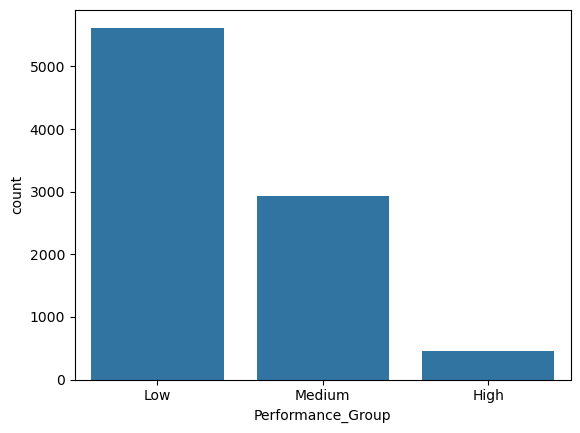

In [159]:
import seaborn as sns
# Calculate average score
d_frame['Avg_Score'] = d_frame[['Math', 'Physics', 'Chemistry']].mean(axis=1)

# Define performance groups
d_frame['Performance_Group'] = pd.cut(
    d_frame['Avg_Score'],
    bins=[0, 60, 80, 100],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# View grouped students
print(d_frame[['Roll No.', 'Student_Names', 'Avg_Score', 'Performance_Group']])
sns.countplot(data=d_frame, x='Performance_Group')


Index(['A', 'A+', 'B', 'B+', 'C', 'D', 'F'], dtype='object', name='Grade')
[ 360   49 1797 1014 2187 2887  706]
Grade
D     2887
C     2187
B     1797
B+    1014
F      706
A      360
A+      49
Name: count, dtype: int64
Grade
A      360
A+      49
B     1797
B+    1014
C     2187
D     2887
F      706
Name: count, dtype: int64


C:\Users\tumel\AppData\Local\Temp\ipykernel_21360\3192088038.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="viridis")


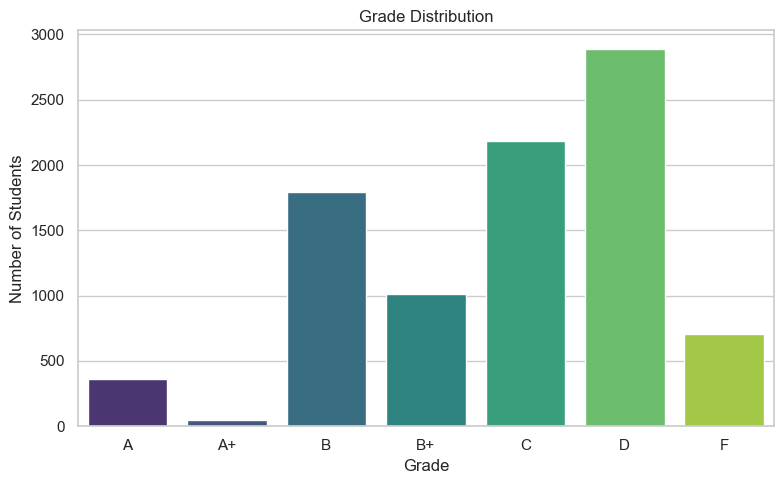

In [190]:
#Using seaborn and matplotlib for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
grade_counts = d_frame['Grade'].value_counts().sort_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="viridis")

plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


#### END OF CODE####